In [1]:
from libs.util import *
from libs.dynamic import *

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/financial-industry.csv')

In [3]:
number_of_nodes = 8
offset = 0
exclude = [17,19,20,27,28,42]

matrix = []
for row in df.values[950:]:
    prow = []
    for i, x in enumerate(row):
        if i not in exclude:
            prow.append(x/1000/1000)
    matrix.append(np.array(prow[1+offset:offset+number_of_nodes+1]))
matrix = np.array(matrix)
    
train_size = int(len(matrix) * 0.96)
train = matrix[:train_size] 
future = matrix[train_size:]
print(len(matrix), len(train), len(future))

247 237 10


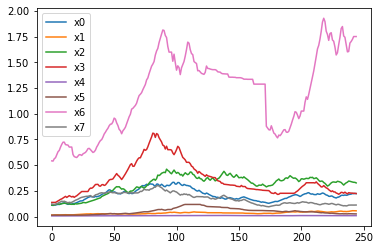

In [4]:
plot_flow(matrix)

In [29]:
import pysindy as ps
dt = 0.01
model = ps.SINDy()
result = model.fit(train, t=dt)

/home/ali/.local/lib/python3.6/site-packages/pysindy/optimizers/stlsq.py:153: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  "coefficients".format(self.threshold)
/home/ali/.local/lib/python3.6/site-packages/pysindy/optimizers/stlsq.py:153: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  "coefficients".format(self.threshold)
/home/ali/.local/lib/python3.6/site-packages/pysindy/optimizers/stlsq.py:153: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  "coefficients".format(self.threshold)


In [30]:
x_test = generate_data_by_model(model, train[0], dt)
steady_state = find_steady_state(x_test)
print('steady_state:', steady_state)

steady_state: [7.29111856e-304 7.29111856e-304 7.29111856e-304 7.29111856e-304
 7.29111856e-304 7.29111856e-304 7.29111856e-304 7.29111856e-304]


/home/ali/.local/lib/python3.6/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [31]:
perturbed = future[0]
x_perturbed = apply_perturbation_by_model(model, perturbed, dt)
perturbed_steady_state = find_steady_state(x_perturbed)
print('perturbed_steady_state:', perturbed_steady_state)

perturbed_steady_state: [0. 0. 0. 0. 0. 0. 0. 0.]


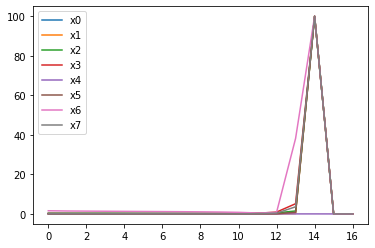

In [32]:
x_flow = flow(x_perturbed, start=1, stop=19)
plot_flow(x_flow, 'single')

[0.0, 0.030965220600859284, 0.05243025868672352, 0.07047781937440849, 0.0871034421494181, 0.10239331500831979, 0.11639430840766346, 0.13059026831800413, nan]


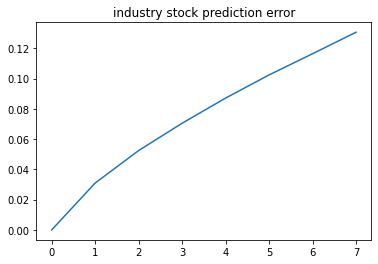

In [37]:
prediction_error_matrix = [flow_prediction_error(x_flow, future, i) for i in range(1,10)]
prediction_error = [sum(error)/number_of_nodes for error in prediction_error_matrix]

print(prediction_error)
plt.figure(2)
plt.rcParams["figure.figsize"] = (6, 4)
plt.title('industry stock prediction error')
plt.plot(prediction_error)

In [34]:
degrees = [number_of_nodes-1]*number_of_nodes
g_matrix = calculate_g_by_model(future[0], steady_state, model, 10)
g_dist = find_matrix_dist(g_matrix)
f, _ = calculate_f(g_matrix, degrees)

/home/ali/.local/lib/python3.6/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [20]:
print(g_matrix)
print(f)

[[1.00000000e+000 6.98030389e+000 1.06907823e+002 3.25251458e+002
  6.81942885e+003 3.66751196e+003 2.23325083e-001 1.02388865e-002]
 [1.54198930e+172 1.00000000e+000 1.54198930e+172 1.54198930e+172
  8.36425077e-132 1.54198930e+172 1.54198930e+172 1.54198930e+172]
 [9.35385243e-003 6.52927325e-002 1.00000000e+000 3.04235414e+000
  6.37879311e+001 3.43053656e+001 2.08894987e-003 9.57730332e-005]
 [1.00000000e+000 6.48512931e-173 1.00000000e+000 1.00000000e+000
  5.42432478e-304 1.00000000e+000 1.00000000e+000 1.00000000e+000]
 [1.46639847e-004 1.02359069e-003 1.56769468e-002 4.76948239e-002
  1.00000000e+000 5.37803391e-001 3.27483559e-005 1.50142874e-006]
 [1.00000000e+000 6.48512931e-173 1.00000000e+000 1.00000000e+000
  5.42432478e-304 1.00000000e+000 1.00000000e+000 1.00000000e+000]
 [4.47777735e+000 3.12562467e+001 4.78709429e+002 1.45640361e+003
  3.05358841e+004 1.64223020e+004 1.00000000e+000 4.58474540e-002]
 [1.00000000e+000 6.48512931e-173 1.00000000e+000 1.00000000e+000
  5

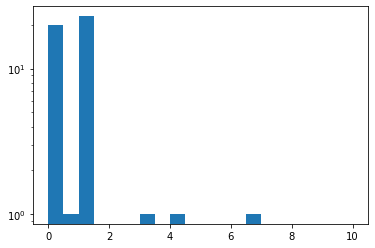

In [21]:
bins=20
_range=(0,10)
plt.rcParams["figure.figsize"] = (6, 4)
plt.figure(2)
plt.hist(g_dist, bins=bins, range=_range, log=True)
plt.show()